<a href="https://colab.research.google.com/github/Chetankamineni/stock-prediction/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-228385652.py:15: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed

Download complete.

Generating static plot with Matplotlib...


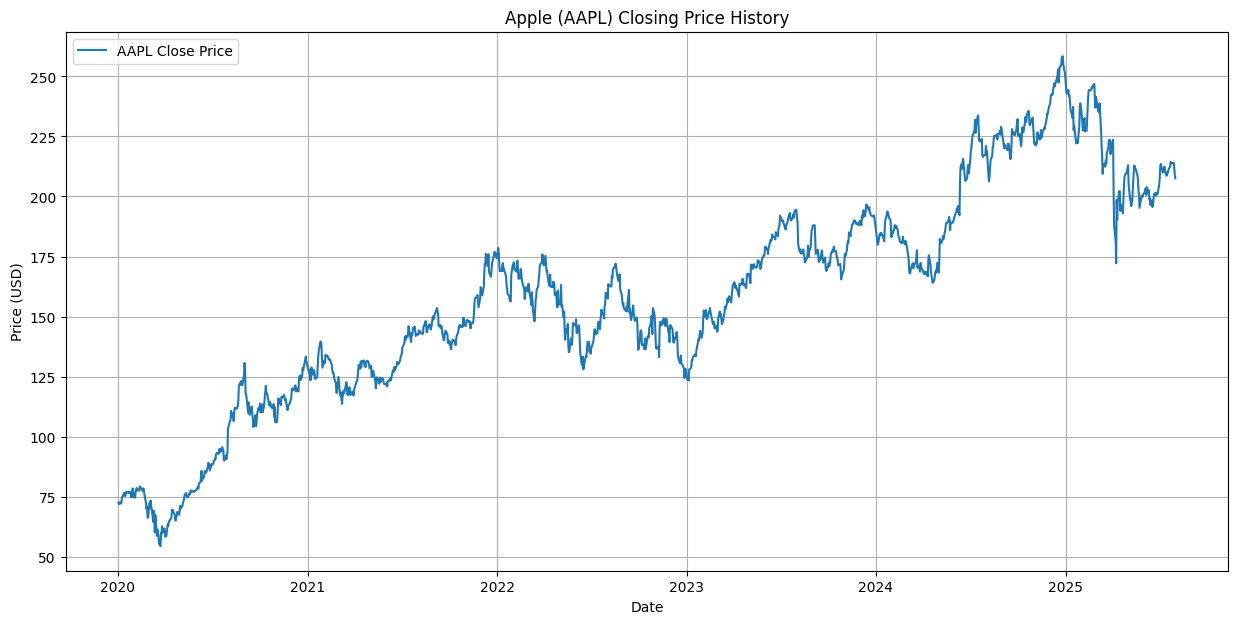

Generating interactive candlestick chart with Plotly...



Training set size: 1121
Test set size: 281


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.




ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1121
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2668.521
Date:                Fri, 01 Aug 2025   AIC                           5349.042
Time:                        15:34:42   BIC                           5379.168
Sample:                             0   HQIC                          5360.429
                               - 1121                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0240      0.025     -0.960      0.337      -0.073       0.025
ar.L2         -0.0169      0.027     -0.619      0.536      -0.070       0.037
ar.L3         -0.0177      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



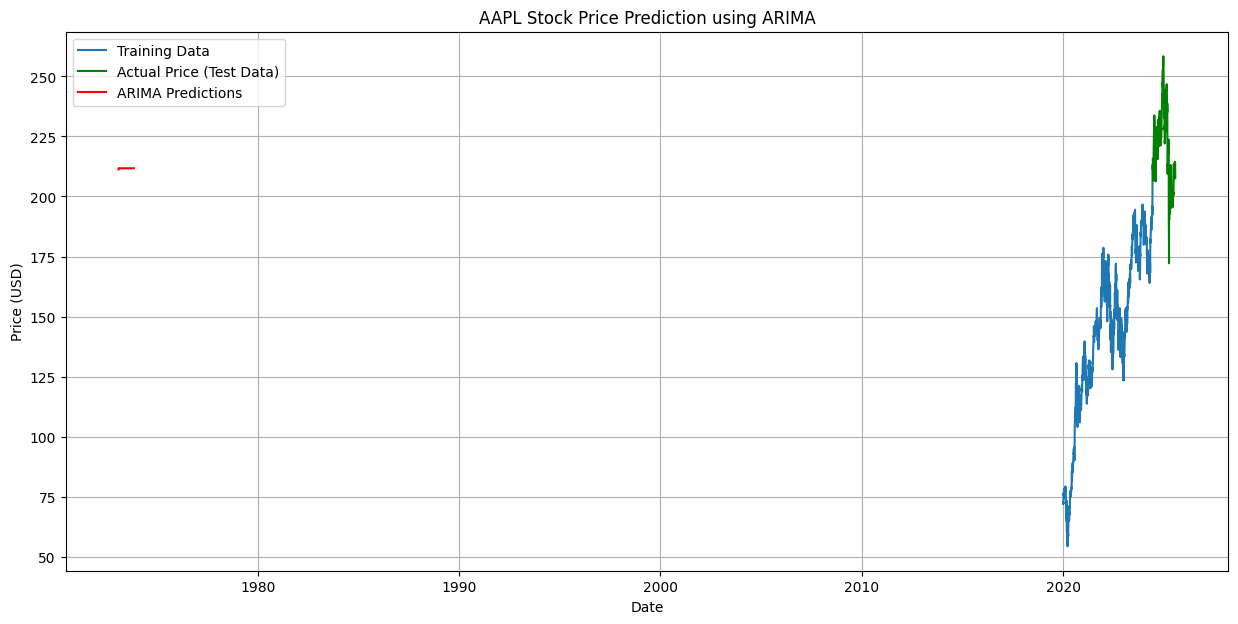


Preparing data for LSTM model...
Building and training LSTM model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1061/1061 ━━━━━━━━━━━━━━━━━━━━ 47s 36ms/step - loss: 0.0047
Making predictions with LSTM model...
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


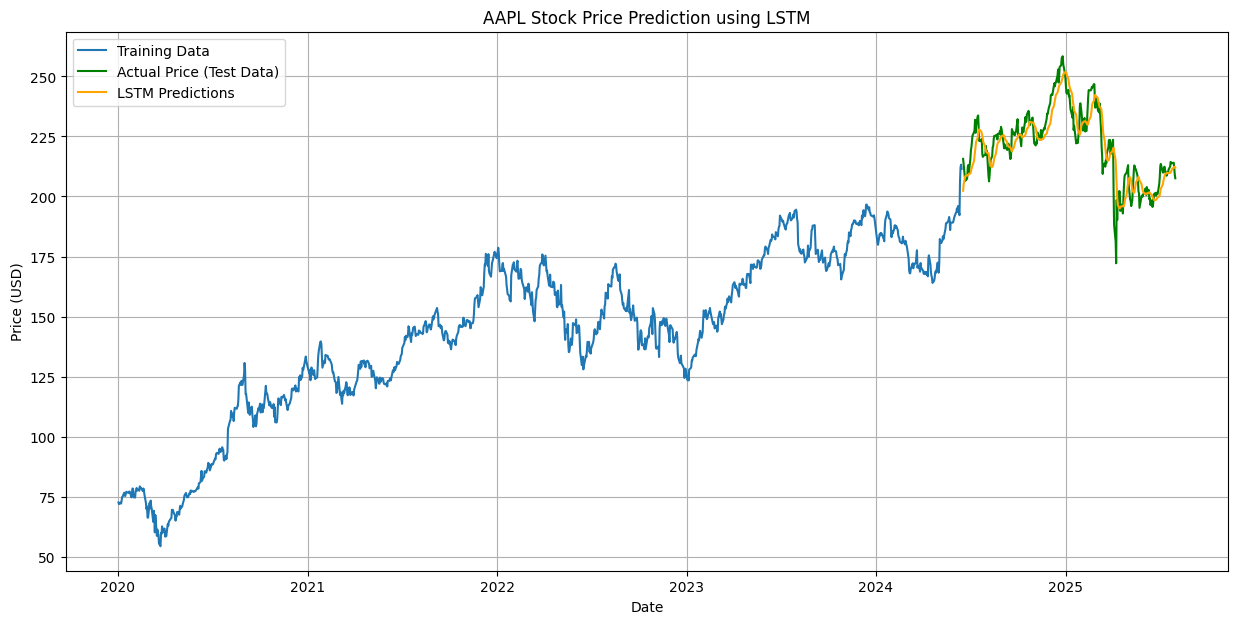


--- ARIMA Model Evaluation ---
RMSE: $17.97
MAE:  $14.61

--- LSTM Model Evaluation ---
RMSE: $7.14
MAE:  $5.43


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# --- Step 1: Data Acquisition ---
# Define the stock ticker and the date range
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2025-08-01' # Use a recent date

# Download the data
print(f"Downloading data for {ticker}...")
# The FutureWarning is normal and can be ignored
data = yf.download(ticker, start=start_date, end=end_date)
print("Download complete.")


# --- Step 2: Data Cleaning and Visualization ---
# Clean up the column names (e.g., from ('Close', 'AAPL') to 'Close')
data.columns = data.columns.droplevel(1)

# --- Plotting with Matplotlib (Static Chart) ---
print("\nGenerating static plot with Matplotlib...")
plt.figure(figsize=(15, 7))
plt.plot(data.index, data['Close'], label='AAPL Close Price')
plt.title('Apple (AAPL) Closing Price History')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# --- Plotting with Plotly (Interactive Chart) ---
print("Generating interactive candlestick chart with Plotly...")
fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

fig.update_layout(
    title='Apple (AAPL) Interactive Candlestick Chart',
    yaxis_title='Stock Price (USD)',
    xaxis_title='Date',
    xaxis_rangeslider_visible=True # Adds a slider at the bottom
)
fig.show()

from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# --- Step 4: Modeling with ARIMA ---

# We will use the 'Close' price for our time series analysis
close_prices = data['Close']

# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(close_prices) * 0.8)
train_data, test_data = close_prices[0:train_size], close_prices[train_size:]

print(f"\nTraining set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")

# Build the ARIMA model
# The order (p,d,q) is a key parameter. (5,1,0) is a common starting point.
# p: The number of lag observations (autoregressive part).
# d: The number of times the raw observations are differenced (integrated part).
# q: The size of the moving average window (moving average part).
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()
print("\nARIMA Model Summary:")
print(model_fit.summary())

# Make predictions
start_index = len(train_data)
end_index = len(train_data) + len(test_data) - 1
predictions = model_fit.predict(start=start_index, end=end_index, typ='levels')

# Visualize the predictions
plt.figure(figsize=(15, 7))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Price (Test Data)', color='green')
plt.plot(predictions.index, predictions, label='ARIMA Predictions', color='red')
plt.title('AAPL Stock Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# --- Step 4 (Part 2): Modeling with LSTM ---

# 1. Data Preparation
print("\nPreparing data for LSTM model...")
scaler = MinMaxScaler(feature_range=(0, 1))
# Use the entire 'Close' price dataset for scaling
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# We'll use the same train/test split size as before
train_data_scaled = scaled_data[0:train_size, :]

# Create the training data sequences
X_train = []
y_train = []
time_step = 60 # Use 60 previous days to predict the next one

for i in range(time_step, len(train_data_scaled)):
    X_train.append(train_data_scaled[i-time_step:i, 0])
    y_train.append(train_data_scaled[i, 0])

# Convert to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data to be 3D for the LSTM model [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# 2. Build and Train the LSTM Model
print("Building and training LSTM model...")
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, batch_size=1, epochs=1) # Using 1 epoch for speed, can be increased

# 3. Make Predictions
print("Making predictions with LSTM model...")
# We need the last 'time_step' days from the training data to predict the first test value
inputs = data['Close'][len(data) - len(test_data) - time_step:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(time_step, len(inputs)):
    X_test.append(inputs[i-time_step:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

lstm_predictions_scaled = lstm_model.predict(X_test)
# Inverse transform the predictions to get the actual price values
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

# Create a pandas Series for plotting
lstm_predictions = pd.Series(lstm_predictions.flatten(), index=test_data.index)


# 4. Visualize the Predictions
plt.figure(figsize=(15, 7))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Price (Test Data)', color='green')
plt.plot(lstm_predictions.index, lstm_predictions, label='LSTM Predictions', color='orange')
plt.title('AAPL Stock Price Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# --- Step 5: Model Evaluation ---
# Note: Ensure 'predictions' (from ARIMA) and 'lstm_predictions' are available from previous steps

# ARIMA Model Evaluation
arima_rmse = np.sqrt(mean_squared_error(test_data, predictions))
arima_mae = mean_absolute_error(test_data, predictions)
print(f"\n--- ARIMA Model Evaluation ---")
print(f"RMSE: ${arima_rmse:.2f}")
print(f"MAE:  ${arima_mae:.2f}")


# LSTM Model Evaluation
lstm_rmse = np.sqrt(mean_squared_error(test_data, lstm_predictions))
lstm_mae = mean_absolute_error(test_data, lstm_predictions)
print(f"\n--- LSTM Model Evaluation ---")
print(f"RMSE: ${lstm_rmse:.2f}")
print(f"MAE:  ${lstm_mae:.2f}")

In [ ]:
# 1. Install necessary packages
!pip install streamlit pyngrok pmdarima -q

# 2. Add your ngrok Authtoken
from pyngrok import ngrok
ngrok.set_auth_token("30gvlE7aEMftICSipj9mIZVU4s4_6s1htWEUfgfHAgrkQEnkA") # <--- PASTE YOUR TOKEN HERE

# 3. Define your app code as a multiline string
app_code = """
import streamlit as st
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import pmdarima as pm
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- Page Configuration ---
st.set_page_config(page_title="Stock Price Predictor", layout="wide")

st.title("📈 Stock Price Prediction App")
st.write("This app predicts the future stock price of a selected company using ARIMA and LSTM models.")

# --- Sidebar for User Input ---
st.sidebar.header("User Input")
ticker = st.sidebar.text_input("Enter Stock Ticker", "AAPL").upper()
predict_button = st.sidebar.button("Get Predictions")

# --- Caching Functions for Performance ---
@st.cache_data
def load_data(ticker_symbol):
    data = yf.download(ticker_symbol, start='2020-01-01')
    if not data.empty:
        if isinstance(data.columns, pd.MultiIndex):
            data.columns = data.columns.droplevel(1)
    return data

@st.cache_data
def train_arima_model(train_data):
    model = pm.auto_arima(train_data, seasonal=False, stepwise=True, suppress_warnings=True, trace=False)
    return model

# --- Main Application Logic ---
data = load_data(ticker)

if data.empty:
    st.error(f"Could not download data for ticker '{ticker}'. Please check the ticker symbol.")
else:
    st.header(f"Historical Data for {ticker}")
    fig = go.Figure(data=[go.Candlestick(x=data.index,
                    open=data['Open'], high=data['High'],
                    low=data['Low'], close=data['Close'])])
    fig.update_layout(title=f'{ticker} Candlestick Chart', xaxis_rangeslider_visible=False)
    st.plotly_chart(fig, use_container_width=True)

if predict_button and not data.empty:
    with st.spinner('Training models and making predictions... This may take a few minutes.'):
        close_prices = data['Close']
        train_size = int(len(close_prices) * 0.8)
        train_data, test_data = close_prices[0:train_size], close_prices[train_size:]

        st.header("ARIMA Model Prediction")
        arima_model = train_arima_model(train_data.values)
        arima_predictions = arima_model.predict(n_periods=len(test_data))
        arima_predictions = pd.Series(arima_predictions, index=test_data.index)

        st.header("LSTM Model Prediction")
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(close_prices.values.reshape(-1, 1))
        train_data_scaled = scaled_data[0:train_size]

        time_step = 60
        X_train, y_train = [], []
        for i in range(time_step, len(train_data_scaled)):
            X_train.append(train_data_scaled[i-time_step:i, 0])
            y_train.append(train_data_scaled[i, 0])
        X_train, y_train = np.array(X_train), np.array(y_train)
        X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

        lstm_model = Sequential([
            LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
            LSTM(50, return_sequences=False), Dense(25), Dense(1)
        ])
        lstm_model.compile(optimizer='adam', loss='mean_squared_error')
        lstm_model.fit(X_train, y_train, batch_size=1, epochs=1)

        inputs = close_prices[len(close_prices) - len(test_data) - time_step:].values.reshape(-1,1)
        inputs = scaler.transform(inputs)
        X_test = []
        for i in range(time_step, len(inputs)):
            X_test.append(inputs[i-time_step:i, 0])
        X_test = np.array(X_test)
        X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

        lstm_predictions_scaled = lstm_model.predict(X_test)
        lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
        lstm_predictions = pd.Series(lstm_predictions.flatten(), index=test_data.index)

        st.header("Prediction Comparison")
        fig_comp = go.Figure()
        fig_comp.add_trace(go.Scatter(x=test_data.index, y=test_data, mode='lines', name='Actual Price', line=dict(color='blue')))
        fig_comp.add_trace(go.Scatter(x=arima_predictions.index, y=arima_predictions, mode='lines', name='ARIMA Prediction', line=dict(color='red')))
        fig_comp.add_trace(go.Scatter(x=lstm_predictions.index, y=lstm_predictions, mode='lines', name='LSTM Prediction', line=dict(color='orange')))
        fig_comp.update_layout(title='Model Prediction Comparison', xaxis_title='Date', yaxis_title='Price (USD)')
        st.plotly_chart(fig_comp, use_container_width=True)

        st.header("Model Evaluation Metrics")
        col1, col2 = st.columns(2)
        with col1:
            st.subheader("ARIMA")
            st.write(f"**RMSE:** ${np.sqrt(mean_squared_error(test_data, arima_predictions)):.2f}")
            st.write(f"**MAE:** ${mean_absolute_error(test_data, arima_predictions):.2f}")
        with col2:
            st.subheader("LSTM")
            st.write(f"**RMSE:** ${np.sqrt(mean_squared_error(test_data, lstm_predictions)):.2f}")
            st.write(f"**MAE:** ${mean_absolute_error(test_data, lstm_predictions):.2f}")
"""

# 4. Write the app code to a file
with open("app.py", "w") as f:
    f.write(app_code)

# 5. Launch the app using pyngrok
# Terminate open tunnels if any
ngrok.kill()

# Set up a tunnel to the Streamlit port
public_url = ngrok.connect(8501)
print(f"Click the following link to view your Streamlit app: {public_url}")

# 6. Run streamlit in the background
!streamlit run app.py --server.port 8501

Click the following link to view your Streamlit app: NgrokTunnel: "https://3128bbcc7708.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.86.239.158:8501

  Stopping...
  Stopping...
